load the mnist dataset

In [1]:
import cPickle

# Load the dataset
f = open('mnist.pkl', 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()
train_data, train_target = train_set
test_data, test_target = test_set

In [2]:
import numpy as np

reduce the number of categories

In [3]:
N=3

In [4]:
train_data = train_data[np.where(train_target<N)[0],...]
train_target = train_target[np.where(train_target<N)]
test_data = test_data[np.where(test_target<N)[0],...]
test_target = test_target[np.where(test_target<N)]

multiple class classification requires softmax and specific output format : a vector of 10 probability

In [5]:
train_target_N = np.zeros((train_target.shape[0], N))
test_target_N = np.zeros((test_target.shape[0], N))
for number in range(N):
    train_target_N[np.where(train_target==number),number] = 1
    test_target_N[np.where(test_target==number),number] = 1

Reshape the data to 28x28 images

In [6]:
train_data_sq = train_data.reshape( (train_data.shape[0], 1,28,28 ) )
test_data_sq = test_data.reshape( (test_data.shape[0], 1, 28,28 ) )

In [7]:
train_target.shape

(15578,)

In [8]:
test_target.shape

(3147,)

`Plot the digits for several of them

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

the target is 0
[ 1.  0.  0.]


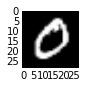

the target is 1
[ 0.  1.  0.]


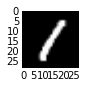

the target is 2
[ 0.  0.  1.]


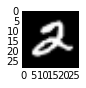

the target is 1
[ 0.  1.  0.]


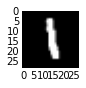

the target is 1
[ 0.  1.  0.]


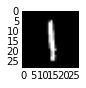

the target is 1
[ 0.  1.  0.]


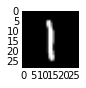

the target is 2
[ 0.  0.  1.]


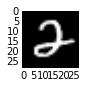

the target is 0
[ 1.  0.  0.]


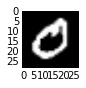

the target is 1
[ 0.  1.  0.]


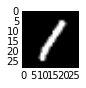

the target is 1
[ 0.  1.  0.]


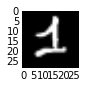

the target is 2
[ 0.  0.  1.]


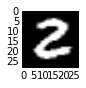

the target is 2
[ 0.  0.  1.]


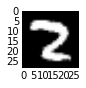

the target is 0
[ 1.  0.  0.]


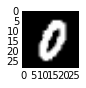

the target is 0
[ 1.  0.  0.]


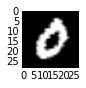

the target is 1
[ 0.  1.  0.]


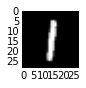

the target is 0
[ 1.  0.  0.]


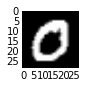

the target is 0
[ 1.  0.  0.]


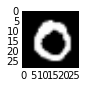

the target is 1
[ 0.  1.  0.]


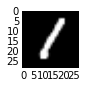

the target is 0
[ 1.  0.  0.]


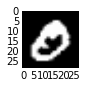

the target is 1
[ 0.  1.  0.]


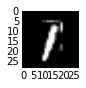

In [10]:
for inum in range( 20):
    plt.figure(figsize=(1,1))
    plt.imshow( train_data_sq[inum,0,...], cmap='Greys_r' )
    print "the target is",train_target[inum]
    print train_target_N[inum]
    plt.show()

create a simple neural net to train on it

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Couldn't import dot_parser, loading of dot files will not be possible.


Using Theano backend.


In [12]:
activation='relu'

In [13]:
simple = Sequential()
simple.add(Dense(1000, input_dim=28*28, activation=activation))
simple.add(Dense(N, init='uniform'))
simple.add(Activation('softmax'))
simple.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [14]:
simple.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
dense_1 (Dense)                    (None, 1000)        785000      dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                    (None, 3)           3003        dense_1[0][0]                    
____________________________________________________________________________________________________
activation_1 (Activation)          (None, 3)           0           dense_2[0][0]                    
Total params: 788003
____________________________________________________________________________________________________


In [15]:
hist = simple.fit( train_data, train_target_N, nb_epoch=400, batch_size=100 ,verbose=0, validation_split=0.2)

Train on 12462 samples, validate on 3116 samples
Epoch 1/4
12462/12462 [==============================] - 2s - loss: 0.4873 - acc: 0.9063 - val_loss: 0.2553 - val_acc: 0.9586
Epoch 2/4
12462/12462 [==============================] - 2s - loss: 0.1888 - acc: 0.9678 - val_loss: 0.1581 - val_acc: 0.9666
Epoch 3/4
12462/12462 [==============================] - 2s - loss: 0.1320 - acc: 0.9726 - val_loss: 0.1223 - val_acc: 0.9708
Epoch 4/4
12462/12462 [==============================] - 2s - loss: 0.1074 - acc: 0.9753 - val_loss: 0.1032 - val_acc: 0.9724


In [16]:
def show_losses( histories ):
    plt.figure(figsize=(10,10))
    #plt.ylim(bottom=0)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Error by Epoch')
    colors=[]
    do_acc=False
    for label,loss in histories:
        color = tuple(np.random.random(3))
        colors.append(color)
        l = label
        vl= label+" validation"
        if 'acc' in loss.history:
            l+=' (acc %2.4f)'% (loss.history['acc'][-1])
            do_acc = True
        if 'val_acc' in loss.history:
            vl+=' (acc %2.4f)'% (loss.history['val_acc'][-1])
            do_acc = True
        plt.plot(loss.history['loss'], label=l, color=color)
        if 'val_loss' in loss.history:
            plt.plot(loss.history['val_loss'], lw=2, ls='dashed', label=vl, color=color)


    plt.legend()
    plt.yscale('log')
    plt.show()
    if not do_acc: return
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    for i,(label,loss) in enumerate(histories):
        color = colors[i]
        if 'acc' in loss.history:
            plt.plot(loss.history['acc'], lw=2, label=label+" accuracy", color=color)
        if 'val_acc' in loss.history:
            plt.plot(loss.history['val_acc'], lw=2, ls='dashed', label=label+" validation accuracy", color=color)
    plt.legend(loc='lower right')
    plt.show()

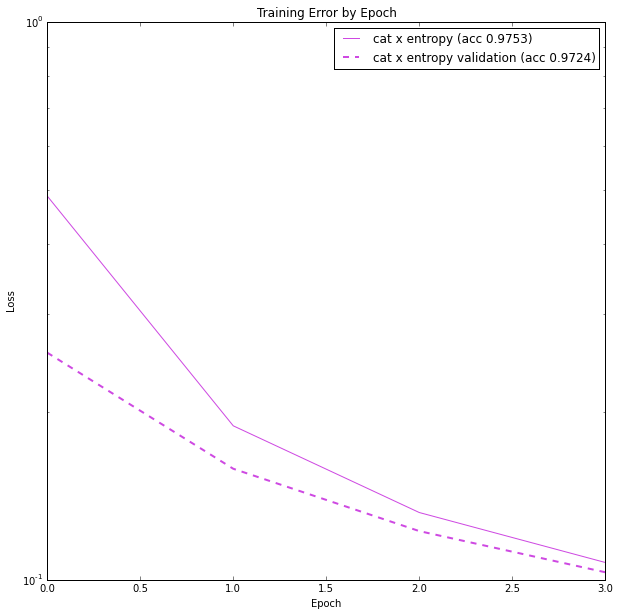

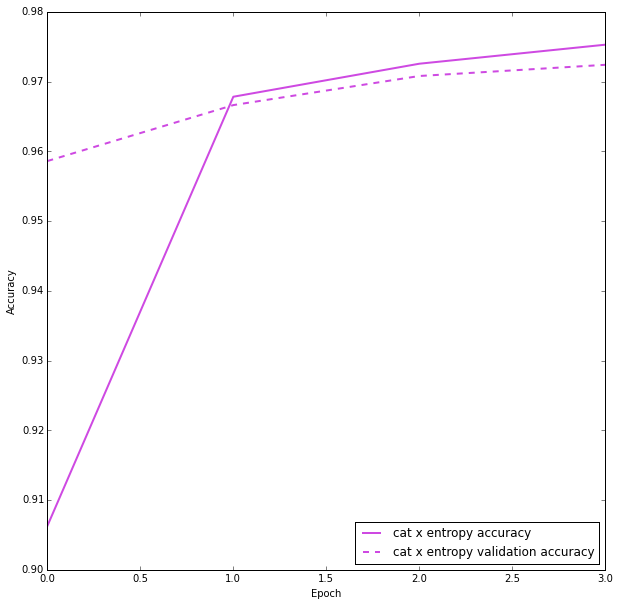

In [17]:
show_losses( [("cat x entropy", hist)])

In [25]:
simple_mse = Sequential()
simple_mse.add(Dense(1000, input_dim=28*28, activation=activation))
simple_mse.add(Dense(N, init='uniform'))
simple_mse.add(Activation('softmax'))
simple_mse.compile(loss='mse', optimizer='sgd',metrics=['accuracy'])

In [26]:
hist_mse = simple_mse.fit( train_data, train_target_N, nb_epoch=400, batch_size=100,verbose=0, validation_split=0.2 )

KeyboardInterrupt: 

Plot the evolution of the losses with epochs

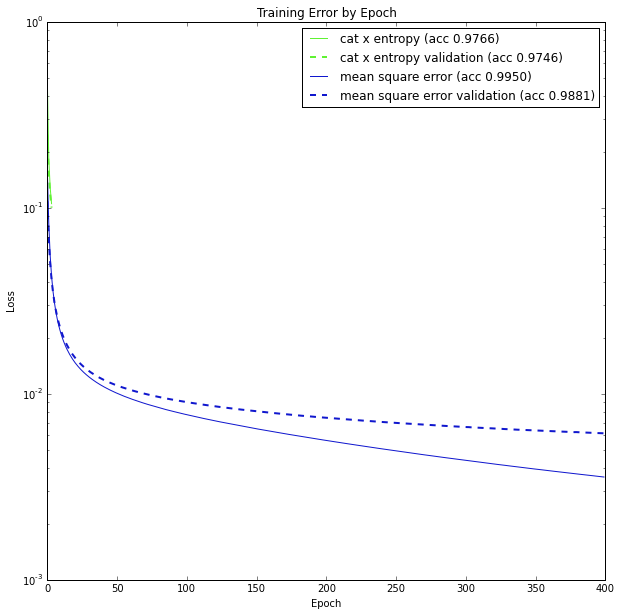

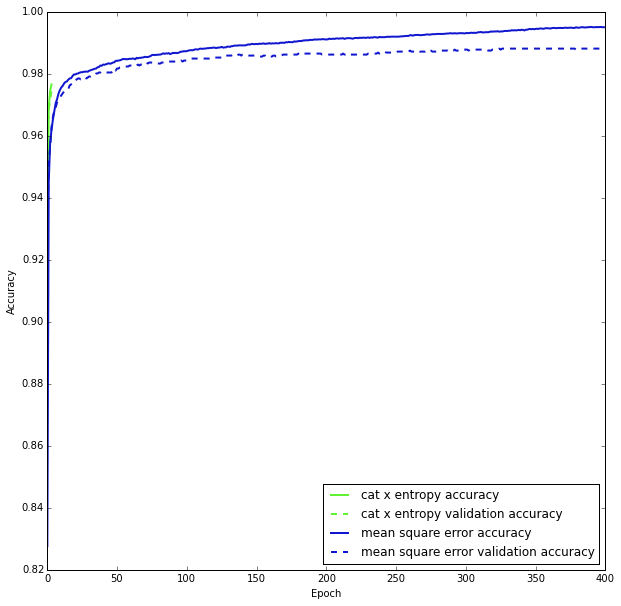

In [20]:
show_losses( [("cat x entropy", hist), ("mean square error", hist_mse)] )

The loss on validation set is not decreasing with better loss on train set. **The models are overfitting**

Add a method to stop training when validation is getting worse

In [24]:
from keras.callbacks import EarlyStopping

add a callback function for checkpointing

In [22]:
from keras.callbacks import ModelCheckpoint

In [23]:
simple = Sequential()
simple.add(Dense(1000, input_dim=28*28, activation=activation))
simple.add(Dense(N, init='uniform'))
simple.add(Activation('softmax'))
simple.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [24]:
hist = simple.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=0,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='simple.h5', verbose=0)]
                 )

KeyboardInterrupt: 

In [ ]:
simple_mse = Sequential()
simple_mse.add(Dense(1000, input_dim=28*28, activation=activation))
simple_mse.add(Dense(N, init='uniform'))
simple_mse.add(Activation('softmax'))
simple_mse.compile(loss='mse', optimizer='sgd',metrics=['accuracy'])

In [ ]:
hist_mse = simple_mse.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=0,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='simple_mse.h5', verbose=0)]
                 )

plot the training and validation losses

In [ ]:
show_losses( [("cat x entropy", hist), ("mean square error", hist_mse)] )

So which of the two models is perfoming better ?

Let's calculate accuracy 

In [ ]:
m = dict([zip(simple.metrics_names,simple.evaluate( test_data, test_target_N ))])

In [ ]:
m

In [ ]:
def accuracy( p ):
    p_cat = np.argmax(p,axis=1)
    print "Fraction of good prediction"
    print len(np.where( p_cat == test_target)[0])
    print len(np.where( p_cat == test_target )[0])/float(len(p_cat)),"%"
    
def accuracy_m( model ):
    ##figure out the shape of the input expected
    if hasattr('input_dim', model.layers[0]):
        p=model.predict(test_data)

    accuracy(p)


In [ ]:
accuracy( simple.predict(test_data) )

In [ ]:
accuracy( simple_mse.predict(test_data) )

Let's keep a deeper network

In [ ]:
deeper = Sequential()
deeper.add(Dense(1000, input_dim=28*28, activation=activation))
deeper.add(Dense(1000, init='uniform', activation=activation))
deeper.add(Dense(N, init='uniform'))
deeper.add(Activation('softmax'))
deeper.compile(loss='mse', optimizer='sgd',metrics=['accuracy'])

In [ ]:
deeper.summary()

In [ ]:
hist_deep = deeper.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=0,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='deeper.h5', verbose=0)]
                 )

In [ ]:
show_losses( [("cat x entropy", hist), ("mean square error", hist_mse), ("deep", hist_deep)] )

In [ ]:
accuracy( deeper.predict(test_data) )

In [ ]:
from keras.layers import Dropout

In [ ]:
deeper_dout = Sequential()
deeper_dout.add(Dense(1000, input_dim=28*28, activation=activation))
deeper_dout.add( Dropout(0.5) )
deeper_dout.add(Dense(1000, init='uniform', activation=activation))
deeper_dout.add( Dropout(0.5) )
deeper_dout.add(Dense(N, init='uniform'))
deeper_dout.add(Activation('softmax'))
deeper_dout.compile(loss='mse', optimizer='sgd',metrics=['accuracy'])

In [ ]:
hist_deepout = deeper_dout.fit( train_data, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=0,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='deeper_dout.h5', verbose=0)]
                 )

In [ ]:
show_losses( [("deep", hist_deep), ("deep with dropout", hist_deepout)] )

In [ ]:
accuracy( deeper_dout.predict(test_data) )

Dropout helped going just a bit further through overfitting

In [42]:
from keras.layers import Convolution2D, Flatten, MaxPooling2D

In [ ]:
cnn_4 = Sequential()
cnn_4.add(Convolution2D(10, 4, 4, input_shape = (1, 28, 28), activation=activation))
cnn_4.add(MaxPooling2D())
cnn_4.add(Flatten())
cnn_4.add(Dense(1000, activation=activation))
cnn_4.add(Dropout(0.5)) ## let's not add it then
cnn_4.add(Dense(N, init='uniform'))
cnn_4.add(Activation('softmax'))
cnn_4.compile(loss='mse', optimizer='sgd',metrics=['accuracy'])

In [ ]:
hist_cnn_4 = cnn_4.fit( train_data_sq, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=0,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='cnn_4.h5', verbose=0)]
                 )

In [ ]:
show_losses( [#("mean square error", hist_mse),
              #("deep", hist_deep),
              ("deep with dropout", hist_deepout),
              ("convolutional", hist_cnn_4)] )

In [ ]:
accuracy( cnn_4.predict(test_data_sq) )

In [ ]:
cnn_3 = Sequential()
cnn_3.add(Convolution2D(10, 3, 3, input_shape = (1, 28, 28), activation=activation))
cnn_3.add(MaxPooling2D())
cnn_3.add(Flatten())
cnn_3.add(Dense(1000, activation=activation))
cnn_3.add(Dropout(0.5))
cnn_3.add(Dense(N, init='uniform'))
cnn_3.add(Activation('softmax'))
cnn_3.compile(loss='mse', optimizer='sgd',metrics=['accuracy'])

In [ ]:
hist_cnn_3 = cnn_3.fit( train_data_sq, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=0,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='cnn_3.h5', verbose=0)]
                 )

In [ ]:
cnn_5 = Sequential()
cnn_5.add(Convolution2D(10, 5, 5, input_shape = (1, 28, 28), activation=activation))
cnn_5.add(MaxPooling2D())
cnn_5.add(Flatten())
cnn_5.add(Dense(1000, activation=activation))
cnn_5.add(Dropout(0.5)) ## let's not add it then
cnn_5.add(Dense(N, init='uniform'))
cnn_5.add(Activation('softmax'))
cnn_5.compile(loss='mse', optimizer='sgd',metrics=['accuracy'])

In [ ]:
hist_cnn_5 = cnn_5.fit( train_data_sq, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=0,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='cnn_5.h5', verbose=0)]
                 )

In [ ]:
show_losses( [
              #("deep", hist_deep),
        ("deep with dropout", hist_deepout),
                ("cnn filter 3", hist_cnn_3),
              ("cnn filter 4", hist_cnn_4),
               ("cnn filter 5", hist_cnn_5)
            ] )

In [ ]:
accuracy( cnn_3.predict(test_data_sq) )
accuracy( cnn_4.predict(test_data_sq) )
accuracy( cnn_5.predict(test_data_sq) )

Can we go even further ?

In [ ]:
from keras.layers import Merge

Let's combine filters of size 3, 4 and 5

In [ ]:
filter_5 = Sequential()
filter_5.add(Convolution2D(10, 5, 5, input_shape = (1, 28, 28), activation=activation))
filter_5.add(MaxPooling2D())
filter_5.add(Flatten())

filter_4 = Sequential()
filter_4.add(Convolution2D(10, 4, 4, input_shape = (1, 28, 28), activation=activation))
filter_4.add(MaxPooling2D())
filter_4.add(Flatten())

filter_3 = Sequential()
filter_3.add(Convolution2D(10, 3, 3, input_shape = (1, 28, 28), activation=activation))
filter_3.add(MaxPooling2D())
filter_3.add(Flatten())

bcnn = Sequential()
bcnn.add(Merge([filter_5,filter_4,filter_3], mode='concat'))
bcnn.add(Dense(1000, activation=activation))
bcnn.add(Dropout(0.5))
bcnn.add(Dense(N, init='uniform'))
bcnn.add(Activation('softmax'))
bcnn.compile(loss='mse', optimizer='sgd',metrics=['accuracy'])

In [ ]:
bcnn.summary()

In [ ]:
hist_bcnn =bcnn.fit( [train_data_sq,train_data_sq,train_data_sq], 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=0,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='bcnn.h5', verbose=0)]
                 )

In [ ]:
show_losses( [
              #("deep with dropout", hist_deepout),
                ("cnn filter 3", hist_cnn_3),
              ("cnn filter 4", hist_cnn_4),
               ("cnn filter 5", hist_cnn_5),
             ("combined cnn", hist_bcnn)
            ] )

In [ ]:
accuracy( bcnn.predict([test_data_sq,test_data_sq,test_data_sq]) )


In [ ]:
filter_5_sig = Sequential()
filter_5_sig.add(Convolution2D(10, 5, 5, input_shape = (1, 28, 28), activation='sigmoid'))
filter_5_sig.add(MaxPooling2D())
filter_5_sig.add(Flatten())

filter_4_sig = Sequential()
filter_4_sig.add(Convolution2D(10, 4, 4, input_shape = (1, 28, 28), activation='sigmoid'))
filter_4_sig.add(MaxPooling2D())
filter_4_sig.add(Flatten())

filter_3_sig = Sequential()
filter_3_sig.add(Convolution2D(10, 3, 3, input_shape = (1, 28, 28), activation='sigmoid'))
filter_3_sig.add(MaxPooling2D())
filter_3_sig.add(Flatten())

bcnn_sig = Sequential()
bcnn_sig.add(Merge([filter_5,filter_4,filter_3], mode='concat'))
bcnn_sig.add(Dense(1000, activation='sigmoid'))
bcnn_sig.add(Dropout(0.5))
bcnn_sig.add(Dense(N, init='uniform'))
bcnn_sig.add(Activation('softmax'))
bcnn_sig.compile(loss='mse', optimizer='sgd',metrics=['accuracy'])

In [ ]:
hist_bcnn_sig =bcnn_sig.fit( [train_data_sq,train_data_sq,train_data_sq], 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=0,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            ModelCheckpoint(filepath='bcnn_sig.h5', verbose=0)]
                 )

In [ ]:
show_losses( [
              #("deep with dropout", hist_deepout),
                #("cnn filter 3", hist_cnn_3),
              ("cnn filter 4", hist_cnn_4),
               #("cnn filter 5", hist_cnn_5),
             ("combined cnn", hist_bcnn),
        ("combined cnn, hidden sigmoid", hist_bcnn_sig)
            ] )

In [ ]:
accuracy( bcnn_sig.predict([test_data_sq,test_data_sq,test_data_sq]) )

Rewrite the model with the function API

In [20]:
from keras.models import Model
from keras.layers import Input, Dense, Merge, Dropout, Convolution2D, MaxPooling2D, Flatten

In [21]:
def make_bcnn_m():
    i = Input(shape=(1,28,28))
    c2 = Convolution2D(10,5,5,activation='relu')(i)
    mp = MaxPooling2D()(c2)
    ft1 = Flatten()(mp)
    c2 = Convolution2D(10,4,4,activation='relu')(i)
    mp = MaxPooling2D()(c2)
    ft2 = Flatten()(mp)
    c2 = Convolution2D(10,3,3,activation='relu')(i)
    mp = MaxPooling2D()(c2)
    ft3 = Flatten()(mp)
    m = Merge(mode='concat')([ft1,ft2,ft3])
    d = Dense(1000, activation='relu')(m)
    dp = Dropout(0.5)(d)
    o = Dense(N, activation='softmax')(dp)

    bcnn_m = Model(input = i, output = o)
    bcnn_m.compile(loss='mse', optimizer='sgd',metrics=['accuracy'])
    return bcnn_m
bcnn_m = make_bcnn_m()

In [22]:
bcnn_m.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
input_2 (InputLayer)               (None, 1, 28, 28)   0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)    (None, 10, 24, 24)  260         input_2[0][0]                    
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)    (None, 10, 25, 25)  170         input_2[0][0]                    
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)    (None, 10, 26, 26)  100         input_2[0][0]                    
___________________________________________________________________________________________

In [26]:
hist_bcnn_m =bcnn_m.fit( train_data_sq, 
                  train_target_N,
                  nb_epoch=1000, 
                  batch_size=100,
                  verbose=0,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            #ModelCheckpoint(filepath='bcnn_m.h5', verbose=0)
                            ]
                 )

Epoch 00192: early stopping


Exercizes

redo all models in the function api, with models return of a function

Implement a KFold cross validation for a generic model and select the best model

In [31]:
def metrics(m, x,Y):
    return dict([zip(m.metrics_names,m.evaluate( x, Y ))])

In [38]:
from sklearn.cross_validation import  KFold


def cross_val(f_m, X, y, nf, batch_size=1000,nb_epoch=4):
    scores=[]
    for train, test in KFold(n=X.shape[0], n_folds=nf, shuffle=True, random_state=42):
        model = f_m()
        h=model.fit(X[train], y[train],
                    nb_epoch=nb_epoch,
                    batch_size=batch_size,
                    verbose=1,
                    validation_split =0.2,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')]
              )
        m = metrics(model , X[test], y[test])
        scores.append( m['acc'] )
    return scores

In [34]:
s = cross_val(make_bcnn_m, train_data_sq, train_target_N, nf=5, nb_epoch=1 )

Train on 9969 samples, validate on 2493 samples
Epoch 1/1
3116/3116 [==============================] - 2s     


KeyError: 'val_acc'

In [35]:
hist_bcnn_m =bcnn_m.fit( train_data_sq, 
                  train_target_N,
                  nb_epoch=1, 
                  batch_size=100,
                  verbose=0,
                  validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min'),
                            #ModelCheckpoint(filepath='bcnn_m.h5', verbose=0)
                            ]
                 )

In [36]:
bcnn_m.evaluate(test_data_sq, test_target_N)

3147/3147 [==============================] - 2s     


[0.0024507076144613246, 0.99396250397203689]

In [37]:
bcnn_m.metrics_names

['loss', 'acc']